<a href="https://colab.research.google.com/github/gopichandchalla16/infosys-internship-real-time-industry-insight-system/blob/anshika-dev/Project_Sprint1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Infosys Springboard Internship Project
## Real-Time Industry Insight & Strategic Intelligence System
### Sprint 1 – Data Sourcing & Handling
**Team Members:** Gopichand, Anshika, Janmejay,

**Objective:** Collect, clean, and visualize real-time company or market data from external open sources.


## Step 1: Interactive User Input
We allow users to enter a **company or asset name** to fetch relevant data dynamically.


In [ ]:
# User input for asset/company
company_name = input("Enter the company name (e.g., Infosys, Rakuten, Netflix, TCS): ")
print(f"\nData analysis will be performed for: {company_name}")

Enter the company name (e.g., Infosys, Rakuten, Netflix, TCS): Netflix

Data analysis will be performed for: Netflix


##  Step 2: Import Required Libraries
We use the following Python libraries:
- `requests` & `BeautifulSoup` for scraping web data
- `pandas` for data manipulation
- `matplotlib` & `seaborn` for visualization
- `textblob` for sentiment analysis
- `yfinance` for market data
- `wikipedia` for Wikipedia summaries


In [ ]:
# Install required libraries (run once)
!pip install yfinance textblob beautifulsoup4 lxml wikipedia feedparser faker

# Import libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import yfinance as yf
import wikipedia
from bs4 import BeautifulSoup
import feedparser
from faker import Faker
import random
import datetime

# Set seaborn style
sns.set(style="whitegrid")

## Step 3: Fetch Wikipedia Summary
We fetch a **short summary** of the asset/company from Wikipedia for context.


In [ ]:
try:
    # Attempt to fetch summary by appending ' company' to the asset name
    try:
        wiki_summary = wikipedia.summary(f"{company_name} company", sentences=10) # Increased sentences to 10
        print(" Wikipedia Summary:\n")
        print(wiki_summary)
    except wikipedia.exceptions.PageError:
        # If appending ' company' doesn't work, try the original asset name
        wiki_summary = wikipedia.summary(company_name, sentences=10) # Increased sentences to 10
        print(" Wikipedia Summary:\n")
        print(wiki_summary)
except Exception as e:
    print(f"Could not fetch Wikipedia summary: {e}")

 Wikipedia Summary:

Netflix, Inc. is an American media company founded on August 29, 1997 by Reed Hastings and Marc Randolph in Scotts Valley, California, and currently based in Los Gatos, California, with production offices and stages at the Los Angeles-based Hollywood studios (formerly old Warner Brothers studios) and the Albuquerque Studios (formerly ABQ studios). It owns and operates an eponymous over-the-top subscription video on-demand service, which showcases acquired and original programming as well as third-party content licensed from other production companies and distributors. Netflix is also the first streaming media company to be a member of the Motion Picture Association.
Netflix initially both sold and rented DVDs by mail, but the sales were eliminated within a year to focus on the DVD rental business. In 2007, Netflix introduced streaming media and video on demand. The company expanded to Canada in 2010, followed by Latin America and the Caribbean. In 2011, the service

## Step 4: Fetch Yahoo Finance Data
We fetch **historical market data** (last 30 days) for the asset using Yahoo Finance.

In [ ]:
try:
    ticker = yf.Ticker(company_name if company_name.upper() in ["BTC-USD","TSLA","AAPL"] else "BTC-USD")
    market_data = ticker.history(period="1mo", interval="1d")
    market_data.reset_index(inplace=True)
    print(f"\n Market Data Sample for {company_name}:")
    display(market_data.head())
except Exception as e:
    print(f"Could not fetch Yahoo Finance data: {e}")


 Market Data Sample for Netflix:


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2025-09-30 00:00:00+00:00,114396.523438,114836.617188,112740.562500,114056.085938,58986330258,0.0,0.0
1,2025-10-01 00:00:00+00:00,114057.593750,118648.929688,113981.398438,118648.929688,71328680132,0.0,0.0
2,2025-10-02 00:00:00+00:00,118652.382812,121086.406250,118383.156250,120681.257812,71415163912,0.0,0.0
3,2025-10-03 00:00:00+00:00,120656.984375,123944.703125,119344.312500,122266.531250,83941392228,0.0,0.0
4,2025-10-04 00:00:00+00:00,122267.468750,122857.640625,121577.570312,122425.429688,36769171735,0.0,0.0


In [ ]:
from IPython.display import display, HTML
import feedparser

# Construct RSS feed URL for Google News
news_url = f"https://news.google.com/rss/search?q={company_name}&hl=en-US&gl=US&ceid=US:en"

feed = feedparser.parse(news_url)

print(f"\n Recent News Headlines for {company_name}:")

# Iterate through the first 10 news items (or fewer if less than 10)
for entry in feed.entries[:10]:
    display(HTML(f'<a href="{entry.link}">{entry.title}</a>'))
    # Display summary and source if available
    summary = getattr(entry, 'summary', 'N/A')
    source = getattr(entry, 'source', 'N/A')
    print(f"Summary: {summary}\nSource: {source.get('title', 'N/A')}\n")


 Recent News Headlines for Netflix:


Summary: <a href="https://news.google.com/rss/articles/CBMiogFBVV95cUxPdUxHdVpYeXdnOXF6VkRXZU01NWZwVzR6RTNzQzN3c2tPSWhWSko0X1ZxUGpwNmlsWld2N0J3MWl0OHBQUXJIS3NlMlFOYWJIN3ZsUGVvSzNOa09BWllWdGc2UlFPUlBsRjJWWXAzZzh5R0Q2ZXhRNHpRb1JnR2xQdHJ6TU45NTJOUEQ5V29NV3ZaS05kMjlid3RBdGpFVjVtTFE?oc=5" target="_blank">Adam Driver To Star In Hostage Drama Series ‘Rabbit, Rabbit’ At Netflix From Philip Barantini, Peter Craig & MRC</a>&nbsp;&nbsp;<font color="#6f6f6f">Deadline</font>
Source: Deadline



Summary: <a href="https://news.google.com/rss/articles/CBMilgFBVV95cUxOQzBVaUpReFR5alJScE13TmNfTC15THlkODdXZVpWdmtTRUNhY1pqWF9zVlFocmJFR25VNlpXOTJVcFRDM0w5bFIwWHJkdmh3S2xmSVpMR3JTdjRSRks4cjJXb2hwdW14Ul91emtfTG03QS0tdDRZdDQzRGVFd1VLUE1CeXNOSGlSUGZ0T21hdzI5OGhmalE?oc=5" target="_blank">Adam Driver to Star in Netflix Hostage Series ‘Rabbit, Rabbit’</a>&nbsp;&nbsp;<font color="#6f6f6f">variety.com</font>
Source: variety.com



Summary: <a href="https://news.google.com/rss/articles/CBMiekFVX3lxTE1rWTNSWi1DcE1faTA4TXFXWGpxQ2YtM3FjeGtFOTZoVXVrT253dkpZeDhkME5fT3BkYUc0U1Izd212NFM3TE1xWGpEZExaWFBJM3RHRHZaeUFjSG5nSnpIalhVVmh5dWh1WUhpc0V0NGNKUE1IUWVsYUx3?oc=5" target="_blank">Casting News: Adam Driver's Netflix Thriller, The Four Seasons Adds A Guest And More</a>&nbsp;&nbsp;<font color="#6f6f6f">TVLine</font>
Source: TVLine



Summary: <a href="https://news.google.com/rss/articles/CBMipAFBVV95cUxQQlFCQWVfOEZTc1pUUXZlMmlOdmdwck1RZ2FyQlIxa2hUWkx4bXh3Tkc3NTV0VXZWel83T1pmcFhIcW9VT2FqSldSR2otQ21Pd2JTd2RuSzJ4NlFQVWgzWTdnZnZRdUc5WkVmSU1jRWJEQU5lZ0xvMHF6aldiVmFRam1pTzZfRG5XZ0VOaGdHWm5aVS1jRDhzSDlaUDd5SHliajRmQQ?oc=5" target="_blank">Netflix CTO announces interactive real-time voting for live content</a>&nbsp;&nbsp;<font color="#6f6f6f">TechCrunch</font>
Source: TechCrunch



Summary: <a href="https://news.google.com/rss/articles/CBMicEFVX3lxTE5CdVgwNmZUOHQxbzRNTEdJSGJlSnRBdkFCb09yM2hMUXM1ME5Dbk5rR21yV3BSRkNKb2lYbm51TlR5RUZSVHl5MGVjVEU2Z0hpTUQ4Q0NtVUw1SzFjSDk1Q2J0cFcxMmcwblNDcEltTVA?oc=5" target="_blank">Canal+ takes on Netflix in Africa with $3bn bet on satellite TV</a>&nbsp;&nbsp;<font color="#6f6f6f">Financial Times</font>
Source: Financial Times



Summary: <a href="https://news.google.com/rss/articles/CBMingFBVV95cUxPa0FNWG9GakI1SWNkSjBpT1U5Z0txNUc3Wjl4anRjM2w0eThEckFabDd3WFJvU0RudWhnY2VBMV9YckxCMk44eTluMWRmSHl4TEtYVkxHelBMbWEtSjl4ZFo0UmNQQlZGRXczYW92RTU4YzZsWV9lemNUMmpoT1hQVlV0aU1PZG5wWVVyR0NOU2hfZ1M3ZG05QnFORXdydw?oc=5" target="_blank">Movie With Will Smith’s Oscar Winning Role To Hit Netflix Soon</a>&nbsp;&nbsp;<font color="#6f6f6f">Yahoo</font>
Source: Yahoo



Summary: <a href="https://news.google.com/rss/articles/CBMimwFBVV95cUxONnlKWGJKWTFmVDdWcWNsM2o2MTJydDExZW1tVk0wLWRSVF9kNER3T2ZVWXdnVlNUc2xKTjdqbFgyajJ3QnIyWmxLWjhVNlJQODR4NjUyejZvdEU3ejBFTF94Q0F1WDYwOGt5SERUQWhpM0F6R01lNlRUTS1uSk1zYUlfNVJlWGVFN2s5V2pZYjZ2bl9faFkzZXgydw?oc=5" target="_blank">‘Nobody Wants This’ Season 2 Brings Back Debate Over Depictions of Jewish Women</a>&nbsp;&nbsp;<font color="#6f6f6f">The New York Times</font>
Source: The New York Times



Summary: <a href="https://news.google.com/rss/articles/CBMimgFBVV95cUxObEdObnpLWnRnMkJjVUhpSG5PWEtlSTc4RkV4NzRDcmx3V0pnSDNPQkZWWGFBRUtVNVg3cTlJQ1ZiYWtGQ2JlX2VnbWdWT3cyWVU1QkhNZkkxZ0ZwNFFyczMyV0t1VE9fZ3JVQXJKcllMcjV2TC01UUJ2NWZZQWVmMmFrdmtxNEZ1MzNyV0FheGRsZ0dQMDNfMXhR?oc=5" target="_blank">‘Nobody Wants This’ Returns To Top Netflix TV Charts; ‘A House Of Dynamite’ Leads Film</a>&nbsp;&nbsp;<font color="#6f6f6f">Deadline</font>
Source: Deadline



Summary: <a href="https://news.google.com/rss/articles/CBMinwFBVV95cUxNUnM0Z3R3MVJpUWhlV1pxNFFnYlBHNDNBSmM4ZmlBUkJOZnJqVmt1Q2ZsTnFPNmk2dTRNNzBSdUlUWGtxR2tsUGdjX3h2YkkzS1pwcDJyMUx4djNLNXFEU2hubDlXdTFDX0Q5M0dmVEYzQlZjY01VZnAzM2ZVMmRMckM4RXV2ZHhQbjN0aWlFeWVNb1NfUUd3MDluMnlsQTQ?oc=5" target="_blank">What’s with the sponcon slop in Nobody Wants This? Netflix, nobody wants this | Alaina Demopoulos</a>&nbsp;&nbsp;<font color="#6f6f6f">The Guardian</font>
Source: The Guardian



Summary: <a href="https://news.google.com/rss/articles/CBMibEFVX3lxTE9UYzVzX2dTVE1oM3lFSEY0OXJlVVB5QVpKSlljWmFvTEhGa0RWb0ZTUWVzbUhSRlRadTVBWnN1ek5sT0FLNU9IODNHVm1jaFVRMTZ6ZXBSMEhkU2E5ZE9wTVVUbW1Oay1mc2ZNVw?oc=5" target="_blank">The 25 Best Halloween Movies on Netflix, From Scary Thrillers to Feel-Good Family Flicks</a>&nbsp;&nbsp;<font color="#6f6f6f">People.com</font>
Source: People.com



## Step 5: Fetch Google News Headlines via RSS
We fetch **recent news headlines** about the asset using Google News RSS.


In [ ]:
# Construct RSS feed URL for Google News
rss_url = f"https://news.google.com/rss/search?q={company_name}&hl=en-US&gl=US&ceid=US:en"

feed = feedparser.parse(rss_url)
news_items = [{"Title": entry.title, "Link": entry.link, "Published": entry.published} for entry in feed.entries[:10]]
news_df = pd.DataFrame(news_items)
print(f"\n Top 10 News Headlines for {company_name}:")
display(news_df)


 Top 10 News Headlines for Netflix:


,Title,Link,Published
0,Adam Driver To Star In Hostage Drama Series ‘R...,https://news.google.com/rss/articles/CBMiogFBV...,"Wed, 29 Oct 2025 17:00:00 GMT"
1,Adam Driver to Star in Netflix Hostage Series ...,https://news.google.com/rss/articles/CBMilgFBV...,"Wed, 29 Oct 2025 18:19:00 GMT"
2,"Casting News: Adam Driver's Netflix Thriller, ...",https://news.google.com/rss/articles/CBMiekFVX...,"Wed, 29 Oct 2025 22:49:00 GMT"
3,Netflix CTO announces interactive real-time vo...,https://news.google.com/rss/articles/CBMipAFBV...,"Tue, 28 Oct 2025 19:06:46 GMT"
4,Canal+ takes on Netflix in Africa with $3bn be...,https://news.google.com/rss/articles/CBMicEFVX...,"Thu, 30 Oct 2025 05:00:04 GMT"
5,Movie With Will Smith’s Oscar Winning Role To ...,https://news.google.com/rss/articles/CBMingFBV...,"Thu, 30 Oct 2025 04:42:00 GMT"
6,‘Nobody Wants This’ Season 2 Brings Back Debat...,https://news.google.com/rss/articles/CBMimwFBV...,"Wed, 29 Oct 2025 20:22:41 GMT"
7,‘Nobody Wants This’ Returns To Top Netflix TV ...,https://news.google.com/rss/articles/CBMimgFBV...,"Tue, 28 Oct 2025 20:08:00 GMT"
8,What’s with the sponcon slop in Nobody Wants T...,https://news.google.com/rss/articles/CBMinwFBV...,"Wed, 29 Oct 2025 18:43:00 GMT"
9,"The 25 Best Halloween Movies on Netflix, From ...",https://news.google.com/rss/articles/CBMibEFVX...,"Wed, 29 Oct 2025 20:30:00 GMT"


## Step 6: Generate Synthetic Tweets
We generate **50 realistic tweets** using `Faker` and random sentiment phrases for demonstration.


In [ ]:
fake = Faker()
positive_phrases = [
    f"{company_name} is surging!",
    f"Profits from {company_name} are amazing!",
    f"Holding {company_name} long-term, confident.",
    f"{company_name} adoption is growing worldwide!",
    f"Investors are optimistic about {company_name}."
]

negative_phrases = [
    f"Worried about {company_name} volatility.",
    f"{company_name} might crash soon.",
    f"{company_name}'s future is uncertain.",
    f"High risks in {company_name} investments.",
    f"{company_name} energy consumption is concerning."
]

neutral_phrases = [
    f"{company_name} price remains stable today.",
    f"Market watching {company_name} closely.",
    f"{company_name} updates coming soon.",
    f"{company_name} performance unchanged.",
    f"Analysts report on {company_name} today."
]

tweets = []
for _ in range(50):
    sentiment_choice = random.choices(
        ["positive", "negative", "neutral"], weights=[0.4, 0.3, 0.3]
    )[0]
    if sentiment_choice == "positive":
        tweets.append(random.choice(positive_phrases))
    elif sentiment_choice == "negative":
        tweets.append(random.choice(negative_phrases))
    else:
        tweets.append(random.choice(neutral_phrases))

tweets_df = pd.DataFrame(tweets, columns=["Tweet"])
tweets_df.head()

,Tweet
0,Netflix's future is uncertain.
1,High risks in Netflix investments.
2,Analysts report on Netflix today.
3,Netflix is surging!
4,Investors are optimistic about Netflix.


## Step 7: Preprocess Tweets & Perform Sentiment Analysis
We analyze the **polarity** of each tweet using `TextBlob` and classify them into Positive, Negative, or Neutral.


In [ ]:
# Sentiment polarity
tweets_df["Polarity"] = tweets_df["Tweet"].apply(lambda x: TextBlob(x).sentiment.polarity)
# Sentiment category
tweets_df["Sentiment"] = tweets_df["Polarity"].apply(
    lambda x: "Positive" if x > 0 else ("Negative" if x < 0 else "Neutral")
)
tweets_df.head()

,Tweet,Polarity,Sentiment
0,Netflix's future is uncertain.,0.00,Neutral
1,High risks in Netflix investments.,0.16,Positive
2,Analysts report on Netflix today.,0.00,Neutral
3,Netflix is surging!,0.00,Neutral
4,Investors are optimistic about Netflix.,0.00,Neutral


## Step 8: Visualize Sentiment Distribution
We create a **bar chart** showing how many tweets fall into each sentiment category.

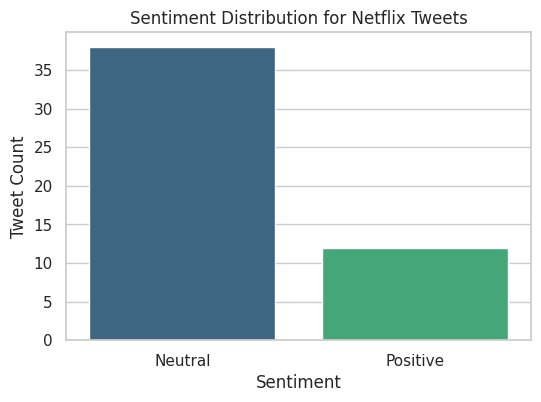

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=tweets_df, x="Sentiment", hue="Sentiment", palette="viridis", legend=False)
plt.title(f"Sentiment Distribution for {company_name} Tweets")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()

## Step 9: Visualize Sentiment Trend Across Tweets
We create a **line chart** showing polarity trend across the 50 tweets.


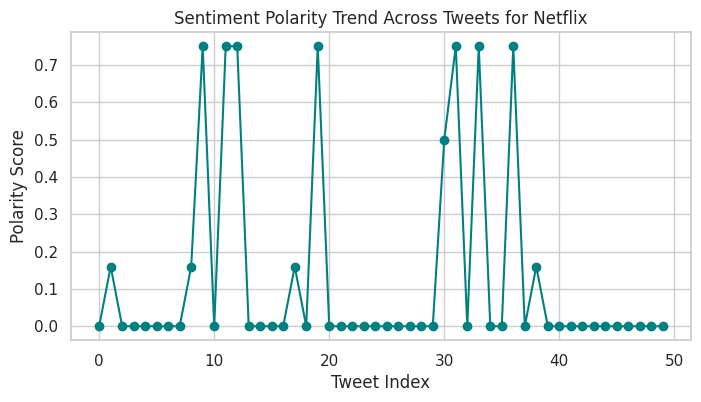

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(tweets_df.index, tweets_df["Polarity"], marker='o', linestyle='-', color='teal')
plt.title(f"Sentiment Polarity Trend Across Tweets for {company_name}")
plt.xlabel("Tweet Index")
plt.ylabel("Polarity Score")
plt.grid(True)
plt.show()

## Step 10: Visualize Market Price Trend
For context, we visualize the closing price of the asset over the last 30 days.


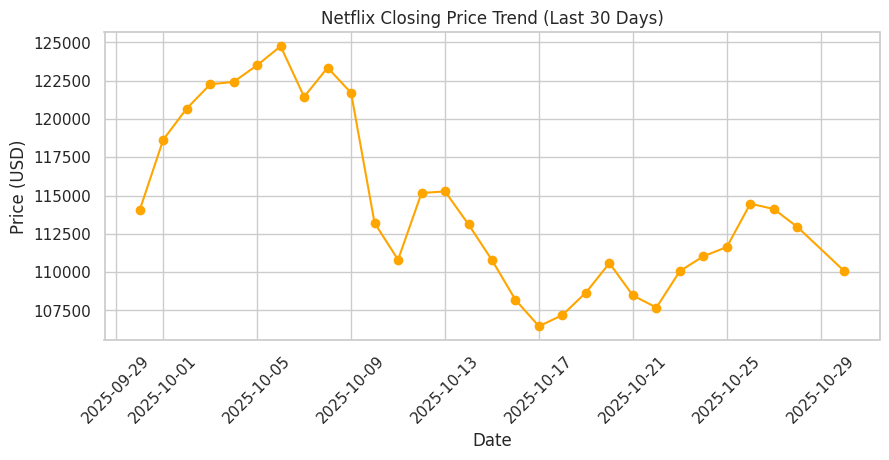

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(market_data["Date"], market_data["Close"], marker='o', color='orange')
plt.title(f"{company_name} Closing Price Trend (Last 30 Days)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Using Alpha Vantage for Stock Data


First, install the library:

In [ ]:
!pip install alpha_vantage

### Analyze Alpha Vantage Data
Here are some descriptive statistics for the Alpha Vantage data:

Now, let's visualize the trading volume over time:

In [ ]:
# This script performs a basic trend analysis on a stock or cryptocurrency
# using the Alpha Vantage API and Simple Moving Averages (SMAs).

# Necessary Imports
from alpha_vantage.timeSeries import TimeSeries
import pandas as pd
from google.colab import userdata # Used to securely retrieve API keys in Colab/Canvas environments

# --- Configuration ---
# WARNING: DO NOT hardcode your API key here.
# We securely load the key from the environment/secrets manager.
# If running locally, you might replace this with: API_KEY = "YOUR_API_KEY"
API_KEY = userdata.get('ALPHA_VANTAGE_API_KEY')

# --- Helper Function for Symbol Lookup ---
def detect_symbol(asset_name: str) -> str:
    """
    Maps common company/asset names to their typical stock or crypto symbols.
    If no match is found, the name itself is returned as the potential symbol.
    """
    mapping = {
        "BITCOIN": "BTCUSD",
        "TESLA": "TSLA",
        "INFOSYS": "INFY",
        "RAKUTEN": "RKUNY",
        "NETFLIX": "NFLX",
        "TCS": "TCS.NS",  # NSE symbol for Tata Consultancy Services
    }
    # Return the mapped symbol or the original name (converted to uppercase for robustness)
    return mapping.get(asset_name.upper(), asset_name.upper())

# --- Core Trend Analysis Logic ---
def get_trend(df: pd.DataFrame) -> tuple[str, str]:
    """
    Calculates 20-day and 50-day Simple Moving Averages (SMA) to determine
    the market trend (Bullish, Bearish, or Sideways).
    The '4. close' column is used for calculations.
    """
    df = df.copy()

    # Check for minimum data requirement for a reliable 50-day SMA
    if len(df) < 50:
        return "⚠️ Insufficient Data", "Cannot calculate trend (needs at least 50 days of data)"

    # Calculate SMAs
    # Note: rolling() automatically aligns the mean to the end of the window
    df['SMA20'] = df['4. close'].rolling(window=20).mean()
    df['SMA50'] = df['4. close'].rolling(window=50).mean()

    # Get the latest calculated values
    latest = df.iloc[-1]

    # Handle potential NaN values (occurs if the window is not yet full)
    if pd.isna(latest['SMA20']) or pd.isna(latest['SMA50']):
         return "⚠️ Data Not Yet Complete", "Need more data points for rolling average calculation"

    # Compare SMAs (Golden Cross / Death Cross strategy)
    if latest['SMA20'] > latest['SMA50']:
        return "✅ Bullish Trend", "The short-term trend (SMA20) is above the long-term trend (SMA50). Potential Uptrend."
    elif latest['SMA20'] < latest['SMA50']:
        return "❌ Bearish Trend", "The short-term trend (SMA20) is below the long-term trend (SMA50). Potential Downtrend."
    else:
        return "↔️ Sideways Market", "SMAs are crossing or are too close. Neutral — Wait for a breakout."

# --- Main Execution Block ---
def run_analysis():
    """
    Main function to ask for user input, fetch data, and print the analysis.
    """
    if not API_KEY:
        print("\n❌ Error: ALPHA_VANTAGE_API_KEY is not configured.")
        print("Please set the 'ALPHA_VANTAGE_API_KEY' secret in your environment.")
        return

    # --- ASK USER ---
    try:
        company_name = input("Enter the company name (e.g., Infosys, Rakuten, Netflix, TCS): ")
    except EOFError:
        # Handle non-interactive environments by using a default
        company_name = "TESLA"
        print(f"Non-interactive environment detected. Using default company: {company_name}")


    if not company_name:
        print("Analysis cancelled: Company name cannot be empty.")
        return

    print(f"\nData analysis will be performed for: {company_name}")

    # --- SYMBOL DETECTION ---
    symbol = detect_symbol(company_name)
    print(f"Using symbol: {symbol}")

    # --- FETCH & PROCESS ---
    try:
        # Initialize the TimeSeries client
        # output_format='pandas' is essential for DataFrame operations
        ts = TimeSeries(key=API_KEY, output_format='pandas')

        # Fetch daily data (compact size fetches 100 data points, good for 50-day SMA)
        data, meta = ts.get_daily(symbol=symbol, outputsize='compact')
        # Alpha Vantage returns data newest-first, so sort the index (date) oldest-first
        data = data.sort_index()

        print(f"\n📊 Latest Market Data for {company_name} ({symbol}):")
        # Display the last 3 days of data for review
        print(data[['4. close']].tail(3).to_markdown(numalign="left", stralign="left"))

        # Perform the trend analysis
        trend, decision = get_trend(data)

        # Output the results
        print("\n--- Analysis Result ---")
        print(f"Asset: {company_name} ({symbol})")
        print(f"📌 Trend Status: {trend}")
        print(f"🧾 Decision: {decision}")
        print("-----------------------")

    except ValueError as ve:
        # Alpha Vantage throws ValueError on invalid symbol or API key issues
        print(f"\n❌ Error fetching data for {company_name} ({symbol}):")
        print(f"    Details: {ve}")
        print("    Suggestion: Check if the symbol is correct and if the API key is valid.")

    except Exception as e:
        print(f"\n❌ An unexpected error occurred: {e}")

if __name__ == "__main__":
    run_analysis()

Enter the company name (e.g., Infosys, Rakuten, Netflix, TCS): Netflix

Data analysis will be performed for: Netflix
Using symbol: NFLX

📊 Latest Market Data for Netflix (NFLX):
| date                | 4. close   |
|:--------------------|:-----------|
| 2025-10-27 00:00:00 | 1094.56    |
| 2025-10-28 00:00:00 | 1102.5     |
| 2025-10-29 00:00:00 | 1100.41    |

--- Analysis Result ---
Asset: Netflix (NFLX)
📌 Trend Status: ❌ Bearish Trend
🧾 Decision: The short-term trend (SMA20) is below the long-term trend (SMA50). Potential Downtrend.
-----------------------


Now, let's visualize the closing price over time:

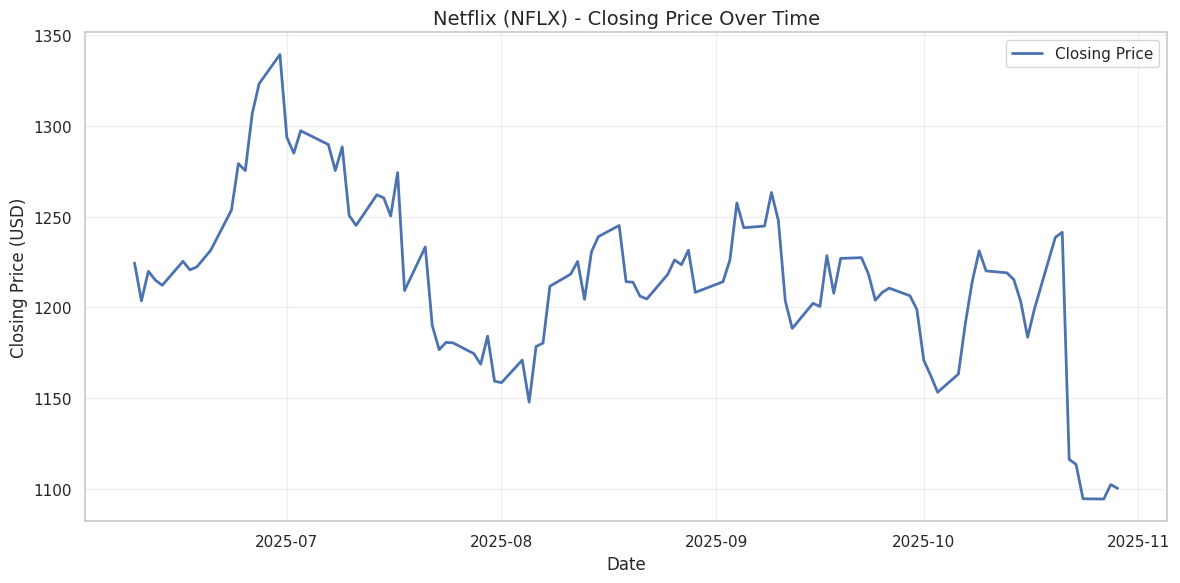

In [ ]:
# Ensure data exists
if 'data' in locals() and not data.empty:
    plt.figure(figsize=(12,6))
    plt.plot(data.index, data['4. close'], label='Closing Price', linewidth=2)

    plt.title(f"{company_name} ({symbol}) - Closing Price Over Time", fontsize=14)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Closing Price (USD)", fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("No data available to visualize. Please run the data fetch cell first.")

In [ ]:
import plotly.graph_objects as go
# Ensure data is available
if 'data' in locals() and not data.empty:
    fig = go.Figure(data=[
        go.Candlestick(
            x=data.index,
            open=data['1. open'],
            high=data['2. high'],
            low=data['3. low'],
            close=data['4. close'],
            name=f"{company_name} ({symbol})"
        )
    ])

    fig.update_layout(
        title=f"{company_name} ({symbol}) - Candlestick Chart",
        xaxis_title="Date",
        yaxis_title="Price (USD)",
        xaxis_rangeslider_visible=False,
        template="plotly_white",
        width=950,
        height=550
    )

    fig.show()
else:
    print("No data available to visualize. Please run the data fetch cell first.")

## Sprint 1 Conclusion
**What we achieved in Sprint 1:**

1. Collected real-time open-source data from:
   - Wikipedia (summary)
   - Yahoo Finance (market prices)
   - Google News RSS (recent headlines)
   - Generated synthetic tweets (50) for sentiment analysis
2. Cleaned and structured data using **pandas DataFrames**
3. Performed sentiment analysis using **TextBlob**
4. Visualized key insights:
   - Sentiment distribution (bar chart)
   - Sentiment trend across tweets (line chart)
   - Market price trend (line chart)
5. Built a flexible, interactive notebook for any asset/company input

This notebook sets the foundation for **Sprint 2**, where we will integrate **real-time dashboards and AI-driven analytics**.
